# Chapter 4 Lab 1

## Goal

The goal of this lab is to show you how to use R to run PCA (Principle Component Analysis) on a dataset and how to interpret the results. 

## Calculcating Principle Components using PCA

The code below reads in a table of data. This data was described in the chapter; it was originally collected from publicly available repository : http://gta.st.ewi.tudelft.nl/ and then modified for our use here. 

The code below first loads up the data. Then runs PCA using the pca module from sklearn.decomposition. 

We've commented out the import of StandardScaler since this data is already normalized. Rather than delete it entirely, we've left it in place to emphasize how important it is to scale your data before PCA.


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [6]:
dota_df1 = pd.read_csv("Dota_normalized.csv")
dota_df1.head()

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,0.141363,0.140590,0.150,0.333333,0.350240,0.095653,0.285714,0.111196,0.122158,0.104007,0.069642,0.080559,0.136486,0.132340,0.259791
1,0.020602,0.022109,0.000,0.000000,0.262429,0.015711,0.309524,0.026489,0.021663,0.012018,0.011797,0.010606,0.018839,0.020158,0.039233
2,0.000634,0.000000,0.000,0.000000,0.269743,0.000463,0.261905,0.001648,0.000523,0.000475,0.000228,0.000163,0.000000,0.000000,0.001125
3,0.031379,0.033447,0.125,0.055556,0.434886,0.045447,0.619048,0.026372,0.027159,0.037422,0.042929,0.033030,0.050750,0.031551,0.057959
4,0.000000,0.000567,0.000,0.000000,0.284200,0.000379,0.666667,0.000118,0.000291,0.000078,0.000182,0.000070,0.000000,0.000000,0.000139


## How many PCs do we need?

The proportion of variance explained is an important concept. In short, at some point, adding additional features does not really increase one's understanding of the relationship being modeled. This can be the case so much so that it is safe to ignore certain features.

PCA's main purpose is to "compress" information into fewer features. In fact, often PCA is used for image compression to minimize the size in bytes but also keep much of the quality of the image.

In data science, it is used to simplify data visualization by reducing components to at least 3 but usually 2 dimensions for graphing or to reduce the number of features in order to speed up machine learning.

There is a drawback. You will usually lose interpretability. When you go from the 15 features above to 3-4 "components", you have to put in some extra work to understand what those components are made up of from the original. "Component1" is very vague and not helpful in explaining the outcome of your model.

Below, we keep all 15 features and allow PCA to calculate their contribution to explaining the variance. The resulting table output the variance explained by each.

In [80]:
pca1 = PCA() #n_components =15 means keep all components so we can plot the variance of each. 
                            #Usually, if you do not specify n_components, it will keep all of them by default. In this case, it would default to 15 as well.

dota_pca1 = pd.DataFrame(pca1.fit_transform(dota_df1))

# Here, we'll add a little manual formatting so we can see the variance explained of each component a little easier.
pca1_df = pd.DataFrame(pca1.explained_variance_ratio_, index=["Component1", "Component2", "Component3", "Component4", "Component5", "Component6", "Component7", "Component8", "Component9", "Component10",
                                                                    "Component11", "Component12", "Component13", "Component14", "Component15"], columns=["Percent of Variance"]).T
pca1_df

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15
Percent of Variance,0.612243,0.221808,0.059425,0.054036,0.029764,0.011646,0.004189,0.003456,0.001345,0.00085,0.000479,0.000369,0.000242,0.000101,0.000049


Now, we can convert this to a cumulative series and plot it on a "scree plot". 

The scree plot gives us a visual indication of where the explanatory "gains" we get by adding another component begin to fall off and can possibly be ignored.

In practice, you will see an "elbow" where the line begins to flatted significantly. The popular rule of thumb is to pick the number of components 1 step after that elbow.

In this case, the elbow is at 3 components, so we would first try to reduce dimensions to 4.

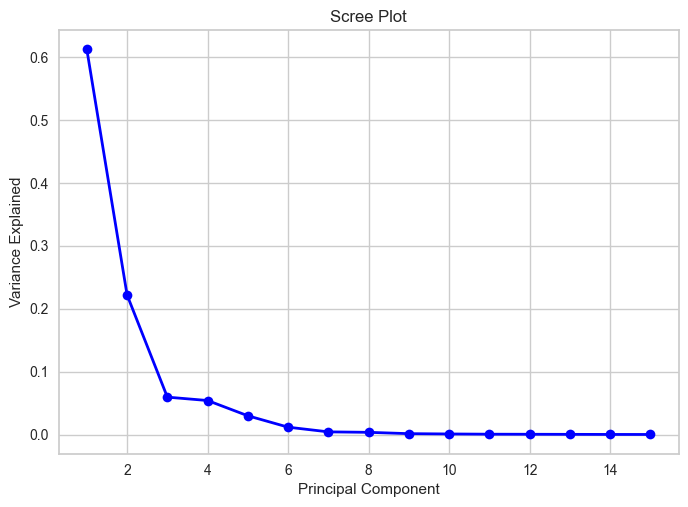

In [81]:
pc_vals = np.arange(pca1.n_components_) + 1
plt.plot(pc_vals, pca1.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## Understanding the PCs
We then calculate loadings. PCs are actually just linear transformations over the old dimension. The loadings show the coefficients of each principle component given the old dimensions or variables.

In [128]:
pca1_loading = pd.DataFrame(pca1.components_.T, columns=["Component1", "Component2", "Component3", "Component4", "Component5", "Component6", "Component7", "Component8", "Component9", "Component10",
                                                                    "Component11", "Component12", "Component13", "Component14", "Component15"], index= ["GamesPlayed", "GamesWon", "GamesLeft", "Ditches", "Points", "Kills", "KillsPerMin", "Deaths", "Assists", "CreepsKilled",
                                                                    "CreepsDenied", "NeutralsKilled", "TowersDestroyed", "RaxsDestroyed", "TotalTime"])
pca1_loading

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15
GamesPlayed,0.253,-0.086,0.106,-0.034,0.053,-0.085,0.215,-0.002,-0.013,0.071,-0.047,0.164,0.354,-0.029,-0.836
GamesWon,0.257,-0.072,0.104,-0.011,0.052,0.038,0.100,0.138,0.040,0.374,-0.088,-0.223,0.107,0.810,0.133
GamesLeft,0.243,-0.028,-0.059,-0.175,-0.941,-0.126,-0.045,0.038,-0.027,-0.009,-0.003,-0.007,-0.001,-0.008,0.016
Ditches,0.272,-0.107,-0.917,-0.142,0.130,0.171,0.089,0.007,0.002,0.000,0.010,0.012,-0.003,-0.003,-0.003
Points,0.185,0.102,-0.128,0.957,-0.124,-0.046,0.034,-0.056,0.036,-0.005,0.008,-0.002,0.003,-0.003,-0.005
Kills,0.245,-0.047,0.126,-0.007,0.024,0.240,-0.155,0.184,0.289,0.206,0.527,0.289,-0.541,0.002,-0.158
KillsPerMin,0.255,0.952,-0.008,-0.145,0.069,-0.037,0.022,-0.003,-0.006,-0.003,-0.006,0.002,0.004,-0.001,0.000
Deaths,0.268,-0.105,0.096,-0.063,0.090,-0.287,0.369,0.019,0.582,-0.502,-0.197,-0.002,-0.178,0.037,0.119
Assists,0.250,-0.083,0.110,-0.018,0.070,-0.089,0.312,0.162,0.038,0.612,-0.202,-0.038,0.029,-0.534,0.278
CreepsKilled,0.202,-0.048,0.137,-0.017,0.003,0.287,0.108,-0.087,0.069,-0.177,0.443,0.267,0.632,-0.042,0.363


Though the output differs than when outputting the loadings in R, the conclusions are the same. In R, the output simple "ignores" very small values. With a little work, we can reproduce the R table exactly.

In [131]:
pca1_loading2 = pca1_loading.copy()
pca1_loading2.loc[:, "Component2":] = pca1_loading2.loc[:, "Component2":].multiply(-1)
pca1_loading2.mask((abs(pca1_loading2) < 0.1), " ")

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15
GamesPlayed,0.253,,-0.106,,,,-0.215,,,,,-0.164,-0.354,,0.836
GamesWon,0.257,,-0.104,,,,,-0.138,,-0.374,,0.223,-0.107,-0.810,-0.133
GamesLeft,0.243,,,0.175,0.941,0.126,,,,,,,,,
Ditches,0.272,0.107,0.917,0.142,-0.130,-0.171,,,,,,,,,
Points,0.185,-0.102,0.128,-0.957,0.124,,,,,,,,,,
Kills,0.245,,-0.126,,,-0.240,0.155,-0.184,-0.289,-0.206,-0.527,-0.289,0.541,,0.158
KillsPerMin,0.255,-0.952,,0.145,,,,,,,,,,,
Deaths,0.268,0.105,,,,0.287,-0.369,,-0.582,0.502,0.197,,0.178,,-0.119
Assists,0.250,,-0.110,,,,-0.312,-0.162,,-0.612,0.202,,,0.534,-0.278
CreepsKilled,0.202,,-0.137,,,-0.287,-0.108,,,0.177,-0.443,-0.267,-0.632,,-0.363


## Using PCs rather than Raw Data

To use the Principle Components instead of the original data, we can use the scores part of the result, which is stored in the output variables from the princomp function. The code below shows two datasets. The original for 10 rows of the data. The second dataset shows the three Principle components for the same first 10 rows in the data.

In [132]:
dota_df1.head(10)

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
0,0.141,0.141,0.150,0.333,0.350,0.096,0.286,0.111,0.122,0.104,0.070,0.081,0.136,0.132,0.260
1,0.021,0.022,0.000,0.000,0.262,0.016,0.310,0.026,0.022,0.012,0.012,0.011,0.019,0.020,0.039
2,0.001,0.000,0.000,0.000,0.270,0.000,0.262,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.001
3,0.031,0.033,0.125,0.056,0.435,0.045,0.619,0.026,0.027,0.037,0.043,0.033,0.051,0.032,0.058
4,0.000,0.001,0.000,0.000,0.284,0.000,0.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.006,0.005,0.000,0.000,0.241,0.006,0.310,0.008,0.006,0.006,0.004,0.008,0.003,0.005,0.014
6,0.005,0.004,0.000,0.000,0.211,0.003,0.238,0.008,0.004,0.002,0.001,0.001,0.001,0.004,0.009
7,0.007,0.006,0.000,0.056,0.267,0.005,0.357,0.008,0.006,0.005,0.005,0.011,0.007,0.006,0.012
8,0.001,0.001,0.000,0.000,0.270,0.001,0.357,0.001,0.001,0.000,0.001,0.002,0.002,0.002,0.001
9,0.067,0.048,0.125,0.056,0.216,0.044,0.262,0.092,0.053,0.036,0.020,0.055,0.041,0.029,0.126


In [149]:
dota_pca1.loc[:9, :3]

,0,1,2,3
0,0.412,-0.143,-0.177,-0.009
1,-0.051,0.007,0.031,-0.001
2,-0.121,-0.020,0.010,0.017
3,0.155,0.297,-0.029,0.086
4,-0.016,0.368,0.004,-0.028
5,-0.096,0.017,0.019,-0.019
6,-0.127,-0.052,0.021,-0.037
7,-0.063,0.059,-0.035,-0.009
8,-0.095,0.071,0.010,0.003
9,0.086,-0.089,0.016,-0.081
